In [1]:
!curl http://optipng.sourceforge.net/pngtech/img/lena.png --output data/lena.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 64  462k   64  300k    0     0   300k      0  0:00:01  0:00:01 --:--:--  223k
100  462k  100  462k    0     0   462k      0  0:00:01  0:00:01 --:--:--  302k


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cv2 import imread

%matplotlib inline

In [4]:
lena = imread("data/lena.png")
lena

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [25]:
def show(img, *args, **kwargs):
    plt.figure(figsize=(12, 12))
    plt.imshow(img, *args, **kwargs)
    plt.axis('off')
    plt.show()

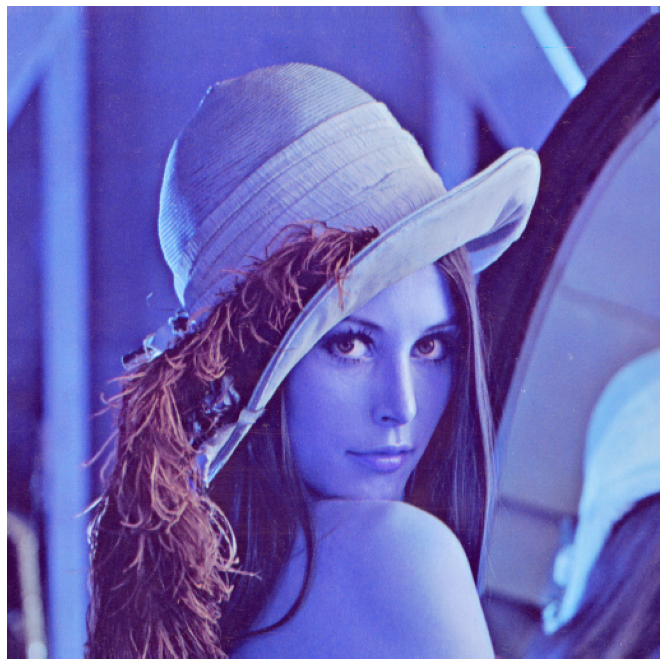

In [8]:
show(lena)

In [9]:
import cv2

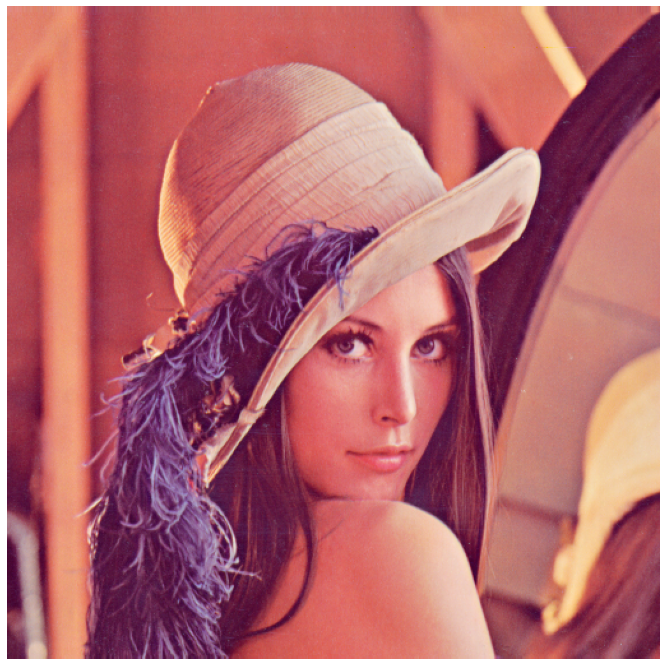

In [11]:
show(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))

In [39]:
def to_multichannel(filter_):
    np.array([np.array(filter_) for _ in range(3)]).transpose((1, 2, 0))

def count_point(img, i, j, filter_):
    n = filter_.shape[0]
    m = filter_.shape[1]
    res = 0.0
    for ii in range(0, n):
        for jj in range(0, m):
            res += img[i - n // 2 + ii][j - m // 2 + jj] * filter_[ii][jj]
    return res
    
def normalize(img):
    mn = img.min()
    mx = img.max()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j] = (img[i][j] - mx) * 255 / (mx - mn)
    return img.astype(np.uint8)
        
def conv(img, filter_, coef=1.0):
    if not isinstance(filter_, np.ndarray):
        filter_ = np.array(filter_)
    
    if len(img.shape) == 3:
        # multichannel colour
        if len(filter_.shape) == 2:
            filter_ = to_multichannel(filter_)
        assert False
    else:
        assert len(img.shape) == 2
        assert len(filter_.shape) == 2
        assert filter_.shape[0] % 2 == 1
        assert filter_.shape[1] % 2 == 1
        
        result = np.zeros((img.shape[0] - filter_.shape[0] + 1, img.shape[1] - filter_.shape[1] + 1), dtype=np.double)
        start_offset_i = filter_.shape[0] // 2
        start_offset_j = filter_.shape[1] // 2
        for i in range(start_offset_i, img.shape[0] - filter_.shape[0] // 2):
            for j in range(start_offset_j, img.shape[1] - filter_.shape[1] // 2):
                result[i - start_offset_j][j - start_offset_j] = count_point(img, i, j, filter_) * coef
        return normalize(result)
        
                

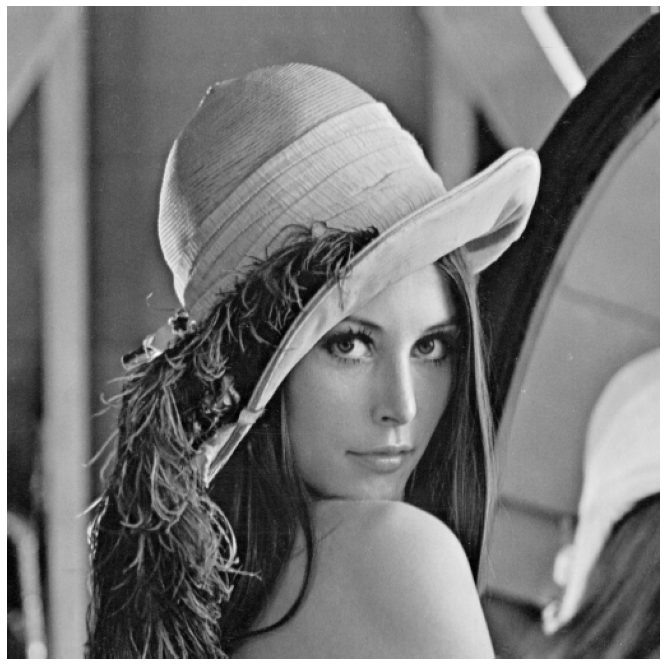

In [35]:
show(cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY), cmap="gray")

In [40]:
x = conv(cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY), [
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])
type(x)

numpy.ndarray

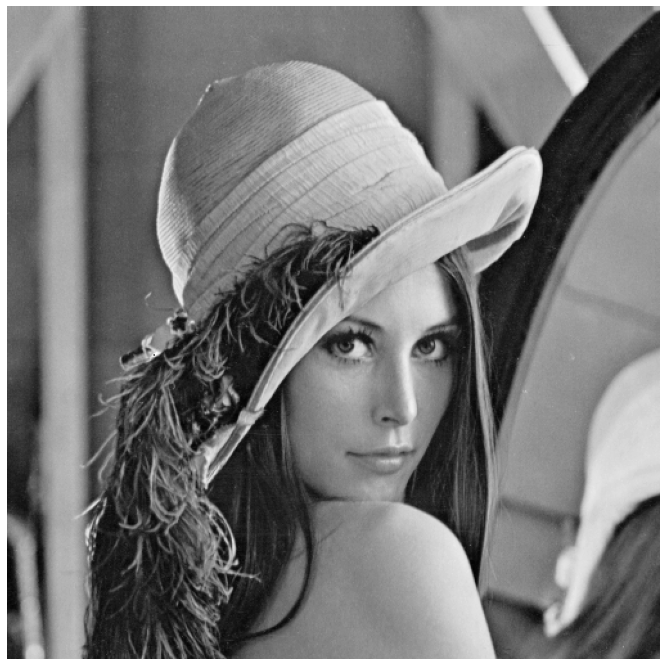

In [44]:
show(x, cmap="gray")

In [53]:
def apply_filter_and_show(filter_, coef=1.0):
    img = conv(cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY), filter_, coef)
    show(img, cmap="gray")

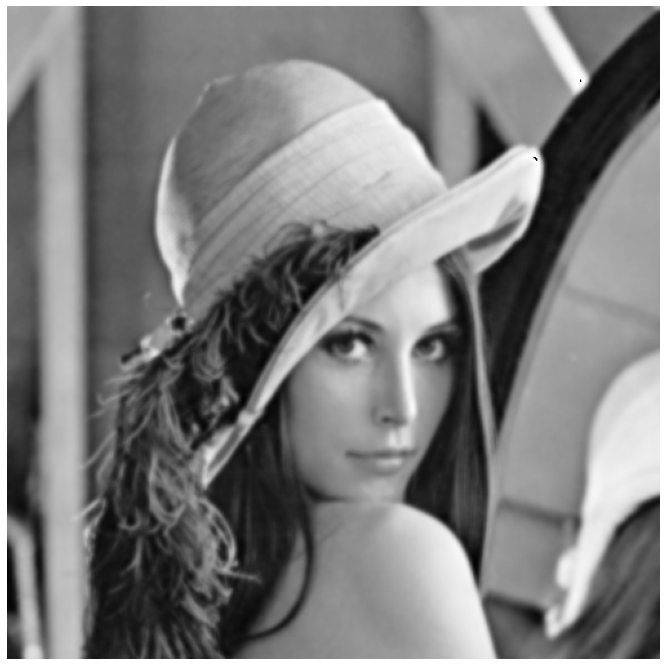

In [55]:
apply_filter_and_show([
    [1, 1, 2,  2, 2, 1, 1],
    [1, 2, 2,  4, 2, 2, 1],
    [2, 2, 4,  8, 4, 2, 2],
    [2, 4, 8, 16, 8, 4, 2],
    [2, 2, 4,  8, 4, 2, 2],
    [1, 2, 2,  4, 2, 2, 1],
    [1, 1, 2,  2, 2, 1, 1],
])

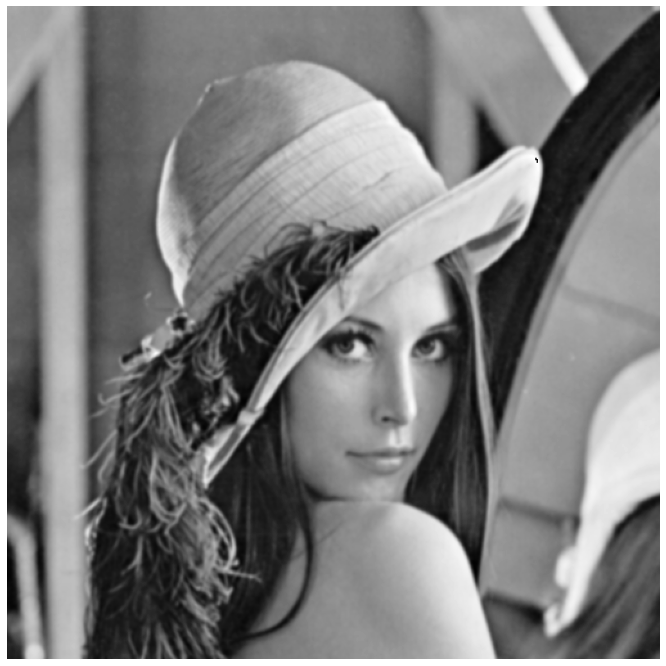

In [57]:
apply_filter_and_show([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
],coef=1/273)

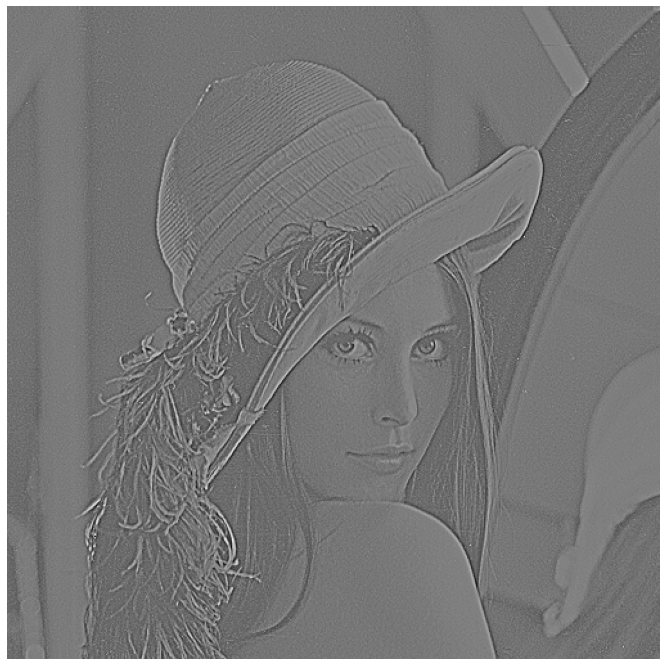

In [59]:
apply_filter_and_show([
     [0, 0, -1, 0, 0],
     [0, -1, -2, -1, 0],
     [-1, -2, 17, -2, -1],
     [0, -1, -2, -1, 0],
     [0, 0, -1, 0, 0]
],coef=1)

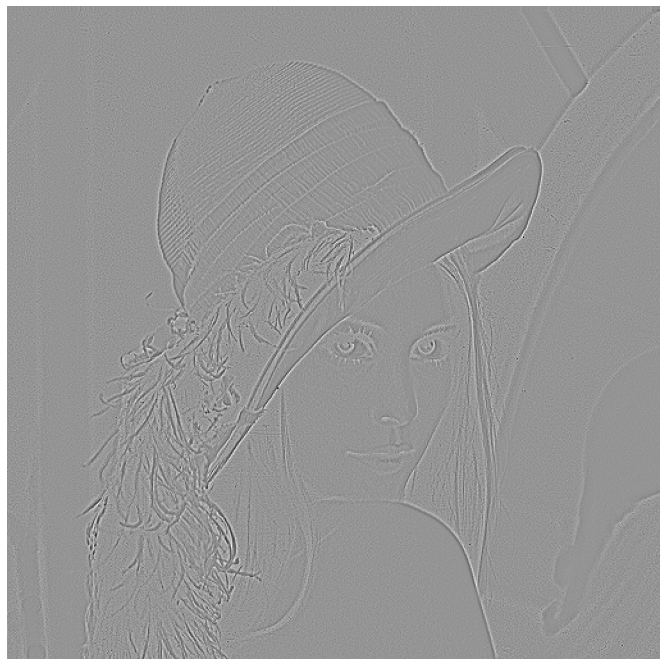

In [60]:
apply_filter_and_show([
    [0, 1, 0], 
    [1, -4, 1],
    [0, 1, 0]
],coef=1)